<a href="https://colab.research.google.com/github/kaviya626/Machine-Learning/blob/main/K_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grouped Dataset (Mean of Features by Cluster):
         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 6.314583          2.895833           4.973958   
1                 5.169697          3.630303           1.493939   
2                 4.747619          2.895238           1.757143   

         petal width (cm)  
Cluster                    
0                1.703125  
1                0.272727  
2                0.352381  

Original Data with Cluster Labels:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0              

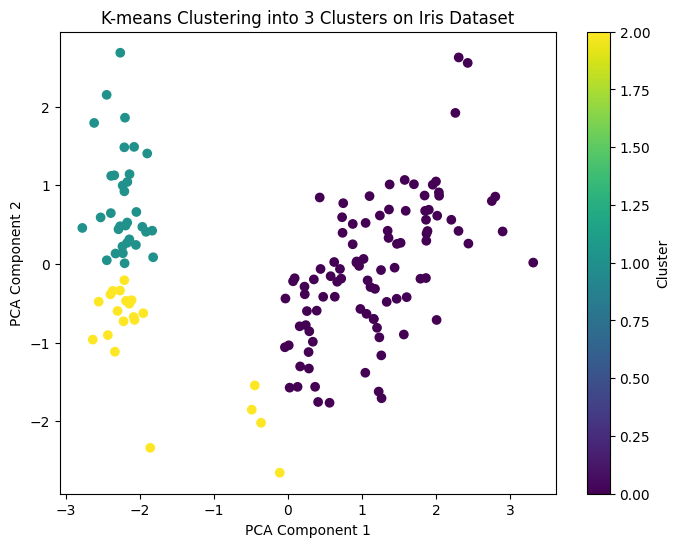

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset (you can replace this with any dataset of your choice)
iris = load_iris()
data = iris.data  # Iris dataset features
labels = iris.target  # True labels (used for visualization only)

# Convert to pandas DataFrame for easier manipulation (optional)
df = pd.DataFrame(data, columns=iris.feature_names)

# Preprocess the data: Scale the features for better performance with K-means
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply KMeans Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # We want to group into 3 clusters
kmeans.fit(scaled_data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Group the dataset by clusters and show the mean of each feature for each cluster
grouped_df = df.groupby('Cluster').mean()  # This will give the mean of each feature for each cluster

# Display the grouped dataset (mean of features for each cluster)
print("Grouped Dataset (Mean of Features by Cluster):")
print(grouped_df)

# Optionally, you can see how the original data points are assigned to clusters
print("\nOriginal Data with Cluster Labels:")
print(df)

# Visualize the clusters using PCA (2D visualization)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot the clusters (using PCA components for 2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering into 3 Clusters on Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()